## Predicting Stock Price Using LSTM Model

#### Sanjit Kapoor
<hr><hr>

### Loading data

In [1]:
import pandas as pd
df = pd.read_csv('samsung.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-23,33220.0,33220.0,32520.0,32980.0,28309.726563,12668600.0
1,2016-11-24,32980.0,33040.0,32660.0,33000.0,28326.886719,7757150.0
2,2016-11-25,32820.0,33040.0,32660.0,33000.0,28326.886719,6276900.0
3,2016-11-28,33000.0,33620.0,32800.0,33540.0,28790.425781,13294050.0
4,2016-11-29,33800.0,33960.0,33380.0,33540.0,28790.425781,18081300.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1222,2021-11-17,71300.0,71600.0,70600.0,70700.0,70700.0,11027606.0
1223,2021-11-18,70700.0,71000.0,70200.0,70200.0,70200.0,10144957.0
1224,2021-11-19,70400.0,71400.0,70100.0,71200.0,71200.0,11954728.0
1225,2021-11-22,73300.0,75200.0,73000.0,74900.0,74900.0,27506623.0
1226,2021-11-23,76000.0,76000.0,74500.0,75300.0,75300.0,21805875.0


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

### Checking Missing Values

In [5]:
df.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

### Visualizing Missing Values

<AxesSubplot:>

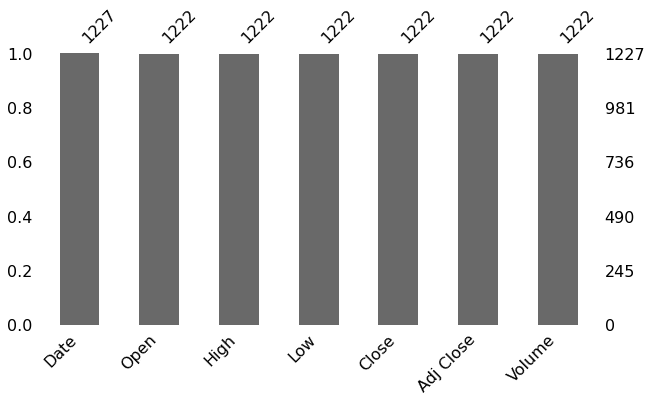

In [6]:
import missingno as msno
msno.bar(df, figsize = (10,5))

### Data Cleaning

In [7]:
df['Open'].fillna(method='pad', inplace=True)
df['High'].fillna(method='pad', inplace=True)
df['Low'].fillna(method='pad', inplace=True)
df['Close'].fillna(method='pad', inplace=True)
df['Adj Close'].fillna(method='pad', inplace=True)
df['Volume'].fillna(method='pad', inplace=True)

### Checking Null Values After Cleaning

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Separating Date and Close Price For Plotting

In [9]:
df1=df.reset_index()['Close']
date = df['Date']
date
plotdf = pd.DataFrame({'Date':date, 'Close':df1})
plotdf

,Date,Close
0,2016-11-23,32980.0
1,2016-11-24,33000.0
2,2016-11-25,33000.0
3,2016-11-28,33540.0
4,2016-11-29,33540.0
...,...,...
1222,2021-11-17,70700.0
1223,2021-11-18,70200.0
1224,2021-11-19,71200.0
1225,2021-11-22,74900.0


### Visualizing The Stock Price Over Time

([<matplotlib.axis.XTick at 0x28ab8d6a8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

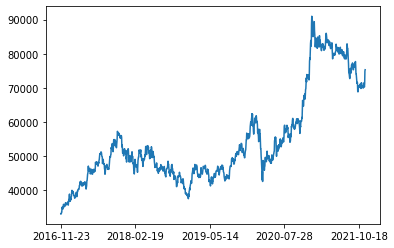

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df1)
plt.xticks(range(0,len(df),300))

### Maximum and Minimum Stock Prices

In [11]:
print("Maximum Stock Price: ")
print(plotdf[plotdf.Close == plotdf.Close.max()])

print("\nMinimum Stock Price: ")
print(plotdf[plotdf.Close == plotdf.Close.min()])

Maximum Stock Price: 
            Date    Close
1011  2021-01-11  91000.0

Minimum Stock Price: 
         Date    Close
0  2016-11-23  32980.0


In [12]:
import numpy as np

### Normalising Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.00000000e+00],
       [3.44708721e-04],
       [3.44708721e-04],
       ...,
       [6.58738366e-01],
       [7.22509479e-01],
       [7.29403654e-01]])

### Splitting Data Into Train and Test Set

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data[:10,]

array([[0.        ],
       [0.00034471],
       [0.00034471],
       [0.00965184],
       [0.00965184],
       [0.03343675],
       [0.03447087],
       [0.02688728],
       [0.0237849 ],
       [0.03412616]])

### Creating time-steps

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_test.shape

(329, 100)

### Reshaping Input Data

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Building LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Fitting Training Data on Model

In [20]:
from keras.callbacks import EarlyStopping
model.fit(X_train,y_train, epochs=100,batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 7s 285ms/step - loss: 0.0177 - val_loss: 0.0056
Epoch 2/100
10/10 [==============================] - 1s 136ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 3/100
10/10 [==============================] - 1s 138ms/step - loss: 0.0020 - val_loss: 0.0110
Epoch 4/100
10/10 [==============================] - 1s 134ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 5/100
10/10 [==============================] - 1s 135ms/step - loss: 0.0016 - val_loss: 0.0083
Epoch 6/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 7/100
10/10 [==============================] - 1s 141ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 8/100
10/10 [==============================] - 1s 135ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 9/100
10/10 [==============================] - 1s 139ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 10/100
10/10 [==============================] - 1s 137ms/step - loss: 0.0011 - val_lo

Epoch 79/100
10/10 [==============================] - 1s 150ms/step - loss: 4.3538e-04 - val_loss: 8.5292e-04
Epoch 80/100
10/10 [==============================] - 1s 144ms/step - loss: 4.2181e-04 - val_loss: 8.7473e-04
Epoch 81/100
10/10 [==============================] - 1s 148ms/step - loss: 4.4066e-04 - val_loss: 7.3677e-04
Epoch 82/100
10/10 [==============================] - 2s 157ms/step - loss: 4.1063e-04 - val_loss: 9.8520e-04
Epoch 83/100
10/10 [==============================] - 1s 141ms/step - loss: 4.2637e-04 - val_loss: 7.6133e-04
Epoch 84/100
10/10 [==============================] - 1s 145ms/step - loss: 4.1477e-04 - val_loss: 6.8016e-04
Epoch 85/100
10/10 [==============================] - 1s 141ms/step - loss: 4.3015e-04 - val_loss: 8.2097e-04
Epoch 86/100
10/10 [==============================] - 1s 149ms/step - loss: 3.9412e-04 - val_loss: 6.4622e-04
Epoch 87/100
10/10 [==============================] - 2s 152ms/step - loss: 3.8053e-04 - val_loss: 6.6699e-04
Epoch 88/1

### Making Prediction

In [21]:
import tensorflow as tf

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

### Scaling Train and Test Data Back To Original Scale

In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
y_test1 = scaler.inverse_transform([y_test])
y_test1 = y_test1[0]
y_train1 = scaler.inverse_transform([y_train])
y_train1 = y_train1[0]

### Accuracy Metrics

#### R2 Score

In [25]:
from sklearn.metrics import r2_score
r2_score(y_train1, train_predict)

0.9469825965150721

In [26]:
r2_score(y_test1, test_predict)

0.9570899151724949

#### RMSE Score

In [27]:
import math
from sklearn.metrics import mean_squared_error
rmse_train = math.sqrt(mean_squared_error(y_train1,train_predict))
rmse_train

1067.2137675289646

In [28]:
rmse_test = math.sqrt(mean_squared_error(y_test1,test_predict))
rmse_test

2038.1058338990085

#### Normalised RMSE

In [29]:
max = df.Close.max()
min = df.Close.min()
print(max,min)

91000.0 32980.0


In [30]:
norm_rmse_train = rmse_train/(max-min)
norm_rmse_train

0.018393894648896323

In [35]:
norm_rmse_test = rmse_test/(max-min)
norm_rmse_test

0.028747127613066522

#### MAPE

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(y_train1,train_predict)
mape_train

0.017935003501180536

In [34]:
mape_test = mean_absolute_percentage_error(y_test1,test_predict)
mape_test

0.02189502485655848

### Plot

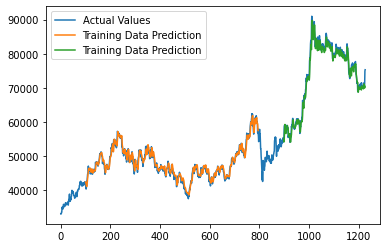

In [29]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label = "Actual Values")
plt.plot(trainPredictPlot, label = "Training Data Prediction")
plt.plot(testPredictPlot, label = "Training Data Prediction")
plt.legend(loc = "upper left")
plt.show()